###Installing required Libraries

In [2]:
!pip install geocoder
!pip install geopy
!pip install folium
print("Libraries Installed!")

     |████████████████████████████████| 102kB 2.5MB/s 
Libraries Installed!


###Importing Required Libraries

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import geocoder
import folium
import requests 
import json 
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("Libraries Imported!")

Libraries Imported!


###Scraping and Preparing the Data

In [5]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
r=requests.get(url)
soup=BeautifulSoup(r.content,'html5lib')

**Define the Data Columns**

In [6]:
column_names = ['Postalcode','Borough','Neighborhood']
toronto = pd.DataFrame(columns = column_names)
toronto

,Postalcode,Borough,Neighborhood


**Convert extracted data into a dataframe**

In [7]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


**Get geographical coordinates**

In [8]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('M5G')

[43.65609000000006, -79.38492999999994]

**Assign latitude and longtitude to each neighborhood**

In [9]:
postal_codes = df['PostalCode']    
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist() ]
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']

df.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Queen's Park,Ontario Provincial Government,43.66253,-79.39188
5,M9A,Etobicoke,Islington Avenue,43.66263,-79.52831
6,M1B,Scarborough,"Malvern, Rouge",43.81139,-79.19662
7,M3B,North York,Don Mills North,43.74923,-79.36186
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.70718,-79.31192
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804


###**Looking at the City of Toronto**

**Get geographical coordinates of Toronto**

In [4]:
address = 'Toronto, Ontario Canada'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto Canada are {}, {}.'.format(latitude, longitude))

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Toronto Canada are 43.6534817, -79.3839347.


**Create map of Toronto**

In [13]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5.5, popup=label, color='black', fill=True, fill_color='#8697cc', fill_opacity=0.99,parse_html=False).add_to(map_toronto)  
map_toronto

In [14]:
CLIENT_ID = 'xxxxxxxx' # Put Your Client Id
CLIENT_SECRET = 'xxxxxxxxx' # Put You Client Secret 
VERSION = '20180604'
LIMIT = 100


**Gather Information on The Neighbourhoods**

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([( name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'], v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

toronto_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'],longitudes=df['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

**Have a peek at the new dataset**

In [17]:
print(toronto_venues.shape)
toronto_venues.head(10)

(2382, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.75245,-79.32991,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.75245,-79.32991,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.75245,-79.32991,TTC stop #8380,43.752672,-79.326351,Bus Stop
3,Victoria Village,43.73057,-79.31306,Wigmore Park,43.731023,-79.310771,Park
4,Victoria Village,43.73057,-79.31306,Memories of Africa,43.726602,-79.312427,Grocery Store
5,Victoria Village,43.73057,-79.31306,Vinnia Meats,43.730465,-79.307520,German Restaurant
6,Victoria Village,43.73057,-79.31306,The Retreat Nail & Beauty Bar,43.726134,-79.312205,Nail Salon
7,"Regent Park, Harbourfront",43.65512,-79.36264,Roselle Desserts,43.653447,-79.362017,Bakery
8,"Regent Park, Harbourfront",43.65512,-79.36264,Tandem Coffee,43.653559,-79.361809,Coffee Shop
9,"Regent Park, Harbourfront",43.65512,-79.36264,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot


**Check out Counts of Restaurants**

In [18]:
toronto_venues_only_restaurant = toronto_venues[toronto_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
toronto_venues_only_restaurant.index = np.arange(1, len(toronto_venues_only_restaurant )+1)

print (toronto_venues_only_restaurant['Venue Category'].value_counts())

Restaurant                         66
Italian Restaurant                 53
Japanese Restaurant                46
Sushi Restaurant                   36
Fast Food Restaurant               35
Seafood Restaurant                 29
Thai Restaurant                    28
American Restaurant                27
Asian Restaurant                   23
Vegetarian / Vegan Restaurant      19
Middle Eastern Restaurant          19
Greek Restaurant                   14
Chinese Restaurant                 13
French Restaurant                  13
Indian Restaurant                  12
Mediterranean Restaurant           11
Mexican Restaurant                 10
Vietnamese Restaurant              10
Ramen Restaurant                    9
New American Restaurant             8
Comfort Food Restaurant             6
Latin American Restaurant           5
Eastern European Restaurant         5
Brazilian Restaurant                5
Caribbean Restaurant                5
Korean Restaurant                   5
Falafel Rest

In [19]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 268 uniques categories.


###Analysing The Neighbourhoods

In [20]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

**Display top 10 common venues in each Neighboorhood**

In [21]:
num_top_venues = 10
for neigh in toronto_grouped['Neighborhood']:
    print("----"+neigh+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == neigh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                  venue  freq
0    Chinese Restaurant  0.17
1          Skating Rink  0.08
2                Bakery  0.08
3       Badminton Court  0.08
4      Sushi Restaurant  0.08
5         Shopping Mall  0.08
6           Supermarket  0.08
7  Hong Kong Restaurant  0.08
8        Discount Store  0.08
9      Department Store  0.08


----Alderwood, Long Branch----
                             venue  freq
0                Convenience Store  0.25
1            Performing Arts Venue  0.25
2                              Gym  0.25
3                              Pub  0.25
4  Molecular Gastronomy Restaurant  0.00
5                           Museum  0.00
6                    Moving Target  0.00
7                    Movie Theater  0.00
8              Moroccan Restaurant  0.00
9              Monument / Landmark  0.00


----Bathurst Manor, Wilson Heights, Downsview North----
                             venue  freq
0                      Men's Store   0.5
1                     Home S

Sort in descending order

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

Display dataset in a readable manner

In [23]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Bakery,Hong Kong Restaurant,Sushi Restaurant,Badminton Court,Supermarket,Discount Store,Department Store,Shopping Mall,Skating Rink
1,"Alderwood, Long Branch",Pub,Convenience Store,Gym,Performing Arts Venue,Event Space,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room
2,"Bathurst Manor, Wilson Heights, Downsview North",Men's Store,Home Service,Women's Store,Event Space,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Farm
3,Bayview Village,Trail,Construction & Landscaping,Park,Ethiopian Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Event Space
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Coffee Shop,Italian Restaurant,Pharmacy,Thai Restaurant,Liquor Store,Sports Club,Butcher,Café,Juice Bar


###Time for **K-Means** Optimization

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

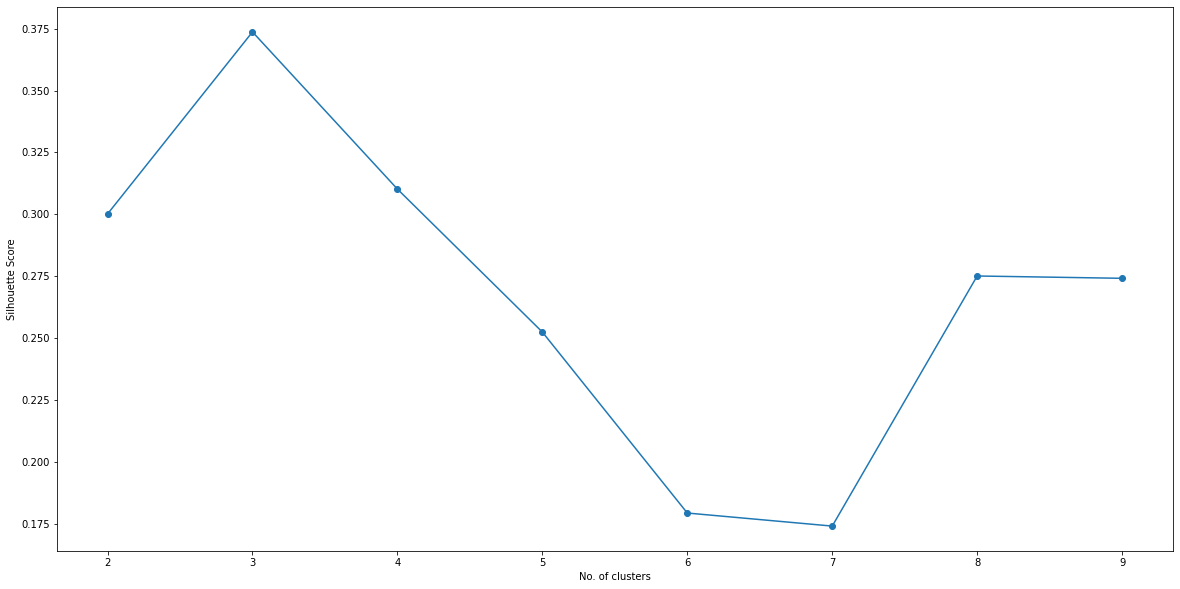

In [25]:
max_range = 10

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = toronto_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
plot(max_range, scores, "No. of clusters", "Silhouette Score")

Clustering Neighborhoods based on the optimal k of 3

In [26]:
kclusters = 3
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(toronto_grouped_clustering)
print(kmeans.labels_[0:10])
print(len(kmeans.labels_))

[0 0 2 0 0 0 0 0 0 0]
102


Create new dataframe that includes the cluster and the top 10 venues for each neighborhood

In [27]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = df
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.75245,-79.32991,0.0,Food & Drink Shop,Park,Bus Stop,Women's Store,Event Space,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Farm
1,M4A,North York,Victoria Village,43.73057,-79.31306,0.0,Nail Salon,German Restaurant,Grocery Store,Park,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264,0.0,Coffee Shop,Breakfast Spot,Restaurant,Theater,Spa,Event Space,Electronics Store,Food Truck,Italian Restaurant,Bakery
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042,0.0,Clothing Store,Women's Store,Toy / Game Store,Restaurant,Men's Store,Bookstore,Food Court,Furniture / Home Store,Cosmetics Shop,American Restaurant
4,M7A,Queen's Park,Ontario Provincial Government,43.66253,-79.39188,0.0,Coffee Shop,Park,Gastropub,Mediterranean Restaurant,Burrito Place,Falafel Restaurant,Café,Sandwich Place,Fried Chicken Joint,Bank


###Peak into the Clusters

####Cluster 1

In [28]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + list(range(1, toronto_merged.shape[1]))]]


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.75245,-79.32991,0.0,Food & Drink Shop,Park,Bus Stop,Women's Store,Event Space,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Farm
1,M4A,North York,Victoria Village,43.73057,-79.31306,0.0,Nail Salon,German Restaurant,Grocery Store,Park,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264,0.0,Coffee Shop,Breakfast Spot,Restaurant,Theater,Spa,Event Space,Electronics Store,Food Truck,Italian Restaurant,Bakery
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042,0.0,Clothing Store,Women's Store,Toy / Game Store,Restaurant,Men's Store,Bookstore,Food Court,Furniture / Home Store,Cosmetics Shop,American Restaurant
4,M7A,Queen's Park,Ontario Provincial Government,43.66253,-79.39188,0.0,Coffee Shop,Park,Gastropub,Mediterranean Restaurant,Burrito Place,Falafel Restaurant,Café,Sandwich Place,Fried Chicken Joint,Bank
5,M9A,Etobicoke,Islington Avenue,43.66263,-79.52831,0.0,Pharmacy,Park,Café,Shopping Mall,Skating Rink,Grocery Store,Bank,Falafel Restaurant,Event Space,Ethiopian Restaurant
6,M1B,Scarborough,"Malvern, Rouge",43.81139,-79.19662,0.0,Fast Food Restaurant,Women's Store,Donut Shop,Fish Market,Fish & Chips Shop,Field,Farmers Market,Farm,Falafel Restaurant,Event Space
7,M3B,North York,Don Mills North,43.74923,-79.36186,0.0,Gas Station,Park,Soccer Field,Burger Joint,Coffee Shop,Women's Store,Ethiopian Restaurant,Eastern European Restaurant,Electronics Store,Elementary School
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.70718,-79.31192,0.0,Pizza Place,Flea Market,Athletics & Sports,Breakfast Spot,Café,Rock Climbing Spot,Bank,Intersection,Gastropub,Fast Food Restaurant
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804,0.0,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant,Hotel,Fast Food Restaurant,Bubble Tea Shop


####Cluster 2

In [29]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + list(range(1, toronto_merged.shape[1]))]]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,M2H,North York,Hillcrest Village,43.80225,-79.35558,1.0,Park,Residential Building (Apartment / Condo),Women's Store,Ethiopian Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Event Space
35,M4J,East YorkEast Toronto,The Danforth East,43.68811,-79.33418,1.0,Intersection,Park,Women's Store,Ethiopian Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Event Space
45,M2L,North York,"York Mills, Silver Hills",43.75698,-79.38060,1.0,Park,Women's Store,Event Space,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Falafel Restaurant
68,M5P,Central Toronto,Forest Hill North & West,43.69479,-79.41440,1.0,Home Service,Park,Women's Store,Event Space,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant
91,M4W,Downtown Toronto,Rosedale,43.68190,-79.37829,1.0,Park,Playground,Bike Trail,Women's Store,Ethiopian Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.65319,-79.51113,1.0,Park,Women's Store,Event Space,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Falafel Restaurant


####Cluster 3

In [30]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + list(range(1, toronto_merged.shape[1]))]]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.75788,-79.44847,2.0,Men's Store,Home Service,Women's Store,Event Space,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Farm
53,M3M,North York,Downsview Central,43.73224,-79.50178,2.0,Construction & Landscaping,Home Service,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Event Space,Farm
62,M5N,Central Toronto,Roselawn,43.71208,-79.41848,2.0,Home Service,Women's Store,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Event Space,Farm


###Exploring Variety of Restaurants

In [31]:
toronto_venues_top30 = toronto_venues_only_restaurant ['Venue Category'].value_counts()[0:30].to_frame(name='frequency')
toronto_venues_top30=toronto_venues_top30.reset_index()
toronto_venues_top30.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
toronto_venues_top30

,Venue_Category,Frequency
0,Restaurant,66
1,Italian Restaurant,53
2,Japanese Restaurant,46
3,Sushi Restaurant,36
4,Fast Food Restaurant,35
5,Seafood Restaurant,29
6,Thai Restaurant,28
7,American Restaurant,27
8,Asian Restaurant,23
9,Vegetarian / Vegan Restaurant,19


Visualizing the above table

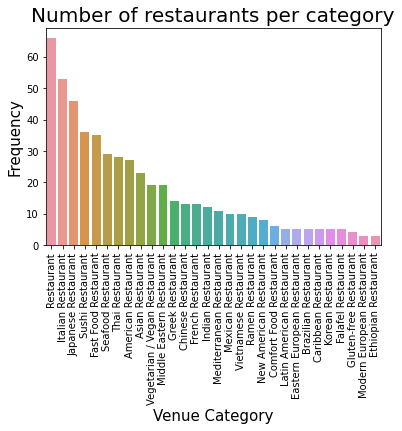

<Figure size 1296x504 with 0 Axes>

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=toronto_venues_top30)
s.set_xticklabels(s.get_xticklabels(), rotation=90, horizontalalignment='center')

plt.title('Number of restaurants per category', fontsize=20)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show();

Showcase restaurants in each neighbourhood

In [36]:
toronto_venues_restaurant = toronto_venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
toronto_venues_restaurant

Neighborhood
Agincourt                                                                                                                                  4
Bedford Park, Lawrence Manor East                                                                                                          9
Berczy Park                                                                                                                               13
Brockton, Parkdale Village, Exhibition Place                                                                                              17
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport                                22
Caledonia-Fairbanks                                                                                                                        1
Central Bay Street                                                                                                                        11


In [37]:
toronto_venues_restaurant_df  = toronto_venues_restaurant.to_frame().reset_index()
toronto_venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
toronto_venues_restaurant_df.index = np.arange(1, len(toronto_venues_restaurant_df)+1)
list_rest_no =toronto_venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =toronto_venues_restaurant_df['Neighborhood'].to_list()

In [38]:
# one hot encoding
torontorestaurant_onehot = pd.get_dummies(toronto_venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
torontorestaurant_onehot['Neighborhood'] = toronto_venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [torontorestaurant_onehot.columns[-1]] + list(torontorestaurant_onehot.columns[:-1])
torontorestaurant_onehot = torontorestaurant_onehot[fixed_columns]

torontorestaurant_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hong Kong Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [39]:
torontorestaurant_grouped = torontorestaurant_onehot.groupby('Neighborhood').mean().reset_index()
torontorestaurant_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hong Kong Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Agincourt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Bedford Park, Lawrence Manor East",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.00,0.111111,0.222222,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
2,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000,0.00,0.000000,0.000000,0.076923,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.230769,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000
3,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.058824,0.00,0.000000,0.117647,0.117647,0.0,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235294,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000
4,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.045455,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.136364,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.272727,0.045455,0.0,0.000000,0.045455,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.000000,0.045455,0.090909,0.045455,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Caledonia-Fairbanks,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.090909,0.090909,0.0,0.000000,0.000000,0.0

**Top 10 most common venues per neighbourhoods**

In [40]:
num_top_venues = 10

for hood in torontorestaurant_grouped['Neighborhood']:
    print("----"+hood+"----")
    tempr = torontorestaurant_grouped[torontorestaurant_grouped['Neighborhood'] == hood].T.reset_index()
    tempr.columns = ['venue','freq']
    tempr = tempr.iloc[1:]
    tempr['freq'] = tempr['freq'].astype(float)
    tempr = tempr.round({'freq': 2})
    print(tempr.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                        venue  freq
0          Chinese Restaurant  0.50
1        Hong Kong Restaurant  0.25
2            Sushi Restaurant  0.25
3         American Restaurant  0.00
4         Peruvian Restaurant  0.00
5   Latin American Restaurant  0.00
6    Mediterranean Restaurant  0.00
7          Mexican Restaurant  0.00
8   Middle Eastern Restaurant  0.00
9  Modern European Restaurant  0.00


----Bedford Park, Lawrence Manor East----
                     venue  freq
0       Italian Restaurant  0.22
1        Indian Restaurant  0.11
2          Thai Restaurant  0.11
3         Sushi Restaurant  0.11
4  Comfort Food Restaurant  0.11
5               Restaurant  0.11
6         Greek Restaurant  0.11
7     Fast Food Restaurant  0.11
8      American Restaurant  0.00
9  New American Restaurant  0.00


----Berczy Park----
                             venue  freq
0               Seafood Restaurant  0.23
1                       Restaurant  0.15
2              Japanese Restaurant

Sort new values in data frame for ease of understanding
 

In [41]:
def return_most_common_venue(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhood_venues_sorted = pd.DataFrame(columns=columns)
neighborhood_venues_sorted['Neighborhood'] = torontorestaurant_grouped['Neighborhood']

for ind in np.arange(torontorestaurant_grouped.shape[0]):
    neighborhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(torontorestaurant_grouped.iloc[ind, :], num_top_venues)

neighborhood_venues_sorted.head(40)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Hong Kong Restaurant,Sushi Restaurant,Eastern European Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
1,"Bedford Park, Lawrence Manor East",Italian Restaurant,Sushi Restaurant,Greek Restaurant,Fast Food Restaurant,Comfort Food Restaurant,Restaurant,Indian Restaurant,Thai Restaurant,Cantonese Restaurant,Falafel Restaurant
2,Berczy Park,Seafood Restaurant,Restaurant,Eastern European Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Japanese Restaurant,French Restaurant,Comfort Food Restaurant,Molecular Gastronomy Restaurant
3,"Brockton, Parkdale Village, Exhibition Place",Restaurant,Italian Restaurant,Japanese Restaurant,French Restaurant,Ethiopian Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Seafood Restaurant,Mexican Restaurant,Hawaiian Restaurant
4,"CN Tower, King and Spadina, Railway Lands, Har...",Italian Restaurant,French Restaurant,Restaurant,Asian Restaurant,Sushi Restaurant,Caribbean Restaurant,Seafood Restaurant,Mexican Restaurant,Ramen Restaurant,Japanese Restaurant
5,Caledonia-Fairbanks,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Fast Food Restaurant
6,Central Bay Street,Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Japanese Restaurant,Mexican Restaurant,Modern European Restaurant,Italian Restaurant,Sushi Restaurant,Seafood Restaurant
7,Christie,Italian Restaurant,Vegetarian / Vegan Restaurant,Hong Kong Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Fast Food Restaurant
8,Church and Wellesley,Japanese Restaurant,Sushi Restaurant,Restaurant,Fast Food Restaurant,Mediterranean Restaurant,American Restaurant,Theme Restaurant,Thai Restaurant,Indian Restaurant,Ramen Restaurant
9,"Clairville, Humberwood, Woodbine Downs, West H...",Middle Eastern Restaurant,Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant


In [43]:
neighborhood_venues_sorted.shape

(60, 11)